In [3]:
import os
import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [4]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'Sample_Data.xlsx')
df = pd.read_excel(file_name, sheetname='Sheet1')
df.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subject_id,question_id,answer,timestamp
0,6,1600,5,06-22-2018 22:18:46
1,6,1601,3,06-22-2018 22:18:55
2,6,1602,3,06-22-2018 22:19:02
3,6,1603,4,06-22-2018 22:19:26
4,6,1600,6,06-22-2018 23:44:43


In [5]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16.tail()

,subject_id,question_id,answer,timestamp
599,27,1603,0,2018-11-20 19:57:46
600,27,1600,5,2018-11-21 05:25:07
601,27,1601,3,2018-11-21 05:25:10
602,27,1602,1,2018-11-21 05:25:14
603,27,1603,0,2018-11-21 05:25:17


In [7]:
mask = (df['question_id'] == 1600)
df_1600 = df.loc[mask].reset_index(drop=True)

df_1600['time_diff'] = 0
k = 0
df_1600['time_diff'] = df_1600['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1600)):
        if pat == df_1600['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1600['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1600['time_diff'][i] = (((df_1600['timestamp'][i] - df_1600['timestamp'][k]).days) + ((df_1600['timestamp'][i] - df_1600['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1600['time_diff'] = df_1600['time_diff'].round(2)
df_1600.tail(7)
#df_1600.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
144,27,1600,4,2018-11-19 20:36:13,14.01
145,27,1600,2,2018-11-20 05:56:42,14.39
146,27,1600,4,2018-11-20 09:59:13,14.56
147,27,1600,4,2018-11-20 14:10:55,14.74
148,27,1600,5,2018-11-20 18:48:51,14.93
149,27,1600,5,2018-11-20 19:57:36,14.98
150,27,1600,5,2018-11-21 05:25:07,15.37


In [8]:
mask = (df['question_id'] == 1601)
df_1601 = df.loc[mask].reset_index(drop=True)
#df_1601.tail()


df_1601['time_diff'] = 0
k = 0
df_1601['time_diff'] = df_1601['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1601)):
        if pat == df_1601['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1601['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1601['time_diff'][i] = (((df_1601['timestamp'][i] - df_1601['timestamp'][k]).days) + ((df_1601['timestamp'][i] - df_1601['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1601['time_diff'] = df_1601['time_diff'].round(2)
df_1601.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
144,27,1601,2,2018-11-19 20:36:16,14.01
145,27,1601,4,2018-11-20 05:56:44,14.39
146,27,1601,2,2018-11-20 09:59:16,14.56
147,27,1601,3,2018-11-20 14:10:58,14.74
148,27,1601,3,2018-11-20 18:48:55,14.93
149,27,1601,4,2018-11-20 19:57:40,14.98
150,27,1601,3,2018-11-21 05:25:10,15.37


In [9]:
mask = (df['question_id'] == 1602)
df_1602 = df.loc[mask].reset_index(drop=True)
#df_1602.tail()

df_1602['time_diff'] = 0
k = 0
df_1602['time_diff'] = df_1602['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1602)):
        if pat == df_1602['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1602['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1602['time_diff'][i] = (((df_1602['timestamp'][i] - df_1602['timestamp'][k]).days) + ((df_1602['timestamp'][i] - df_1602['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1602['time_diff'] = df_1602['time_diff'].round(2)
df_1602.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
144,27,1602,2,2018-11-19 20:36:18,14.01
145,27,1602,4,2018-11-20 05:57:00,14.39
146,27,1602,1,2018-11-20 09:59:18,14.56
147,27,1602,3,2018-11-20 14:11:01,14.74
148,27,1602,3,2018-11-20 18:48:59,14.93
149,27,1602,2,2018-11-20 19:57:43,14.98
150,27,1602,1,2018-11-21 05:25:14,15.37


In [10]:
mask = (df['question_id'] == 1603) 
df_1603 = df.loc[mask].reset_index(drop=True)
#df_1603.tail()

df_1603['time_diff'] = 0
k = 0
df_1603['time_diff'] = df_1603['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1603)):
        if pat == df_1603['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1603['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1603['time_diff'][i] = (((df_1603['timestamp'][i] - df_1603['timestamp'][k]).days) + ((df_1603['timestamp'][i] - df_1603['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1603['time_diff'] = df_1603['time_diff'].round(2)
df_1603.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
144,27,1603,0,2018-11-19 20:36:21,14.01
145,27,1603,0,2018-11-20 05:57:04,14.39
146,27,1603,0,2018-11-20 09:59:21,14.56
147,27,1603,0,2018-11-20 14:11:04,14.74
148,27,1603,0,2018-11-20 18:49:03,14.93
149,27,1603,0,2018-11-20 19:57:46,14.98
150,27,1603,0,2018-11-21 05:25:17,15.37


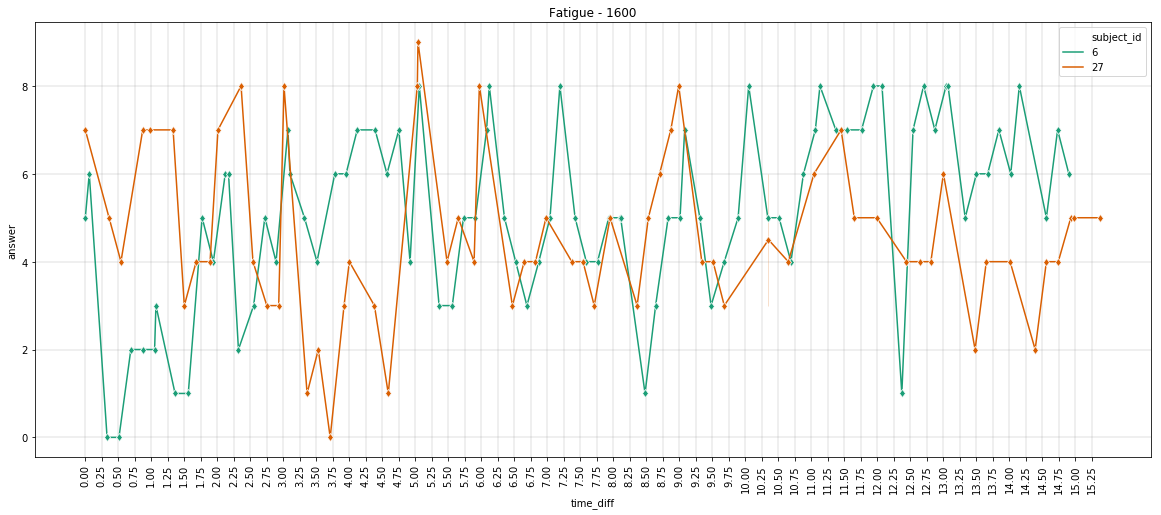

In [11]:
#%matplotlib qt5
%matplotlib inline

#fig = plt.figure()
#axes1 = fig.add_subplot(1,1,1)
#--------------------------------
#axes1.xaxis.set_major_locator(MaxNLocator(integer=True))

# and if you want to force integer to display along y-axis
#axes1.yaxis.set_major_locator(MaxNLocator(integer=True))

df_1600['answer']=df_1600.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1600["time_diff"]
plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, max(x), 0.25),rotation='vertical')
plt.title('Fatigue - 1600')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1600, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')
plt.show()

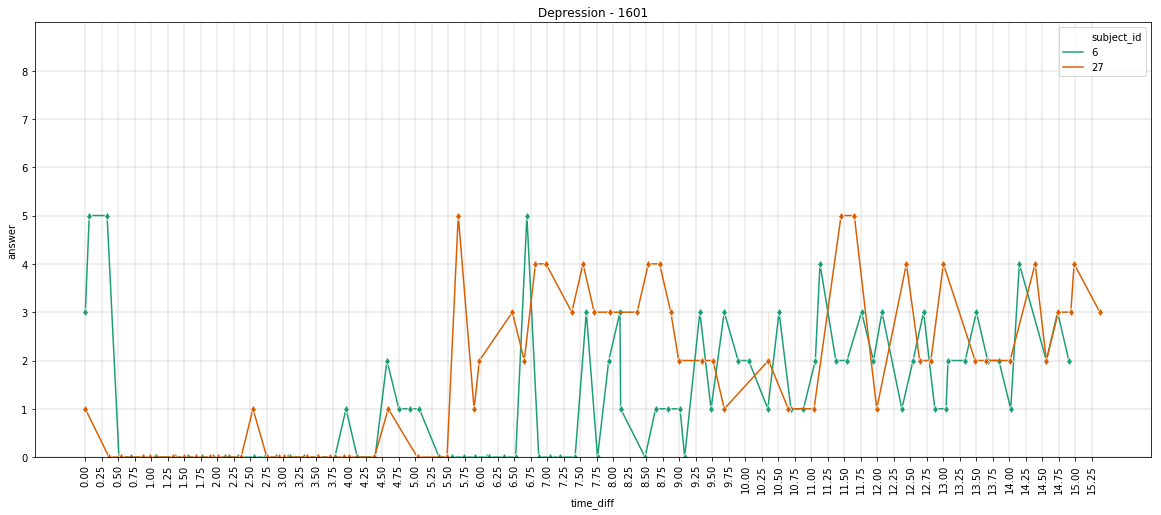

In [12]:
#%matplotlib qt5
%matplotlib inline
df_1601['answer']=df_1601.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1601["time_diff"]
plt.figure(figsize = (20,8))
plt.ylim(0, 9)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, max(x), 0.25),rotation='vertical')
plt.title('Depression - 1601')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1601, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')
plt.show()

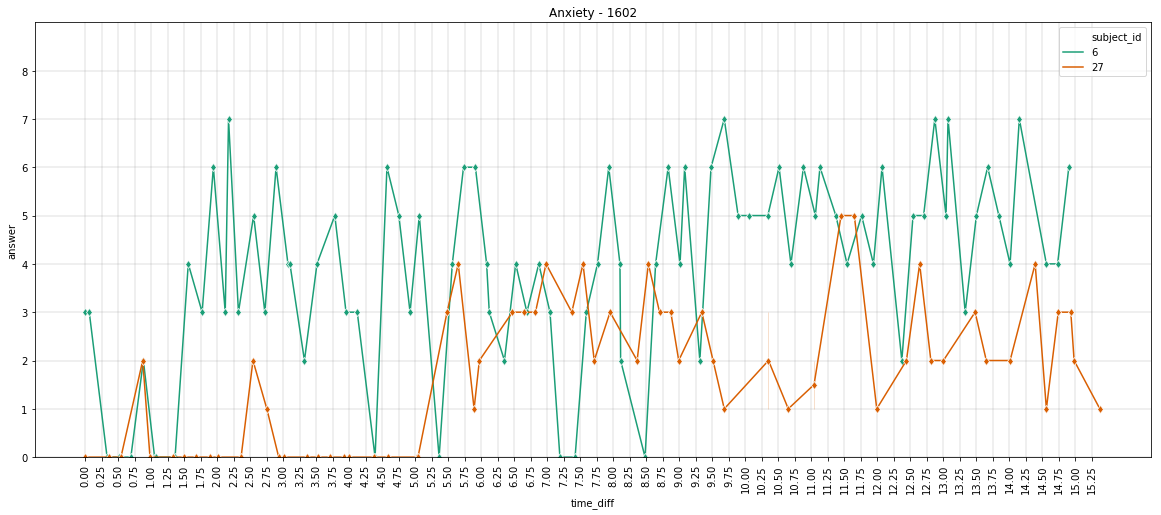

In [13]:
#%matplotlib qt5
%matplotlib inline
df_1602['answer']=df_1602.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1602["time_diff"]
plt.figure(figsize = (20,8))
plt.ylim(0, 9)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, max(x), 0.25),rotation='vertical')
plt.title('Anxiety - 1602')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1602, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')
plt.show()

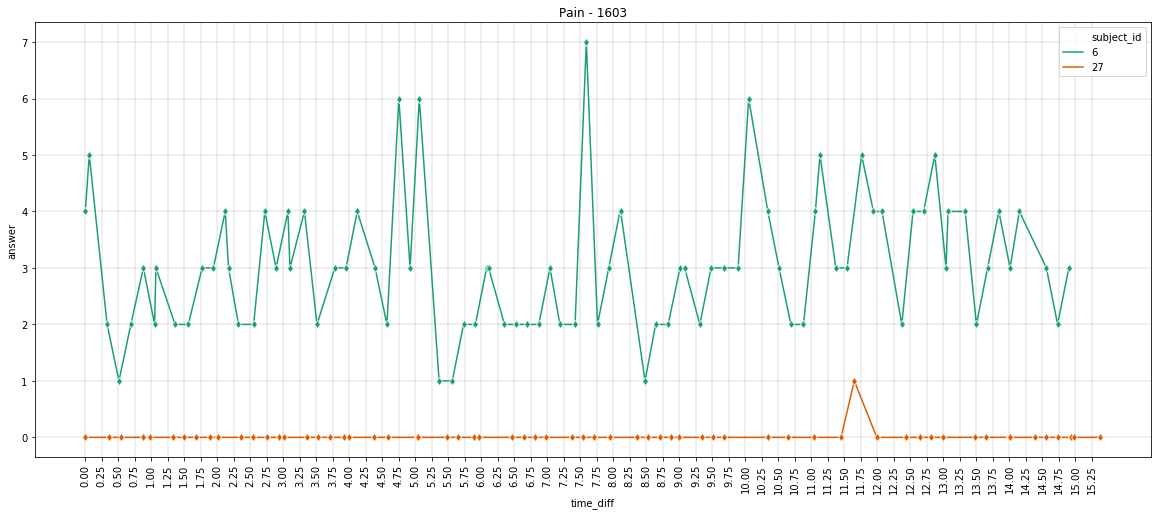

In [14]:
#%matplotlib qt5
#%matplotlib inline


df_1603['answer']=df_1603.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1603["time_diff"]
plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, max(x), 0.25),rotation='vertical')
plt.title('Pain - 1603')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1603, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')

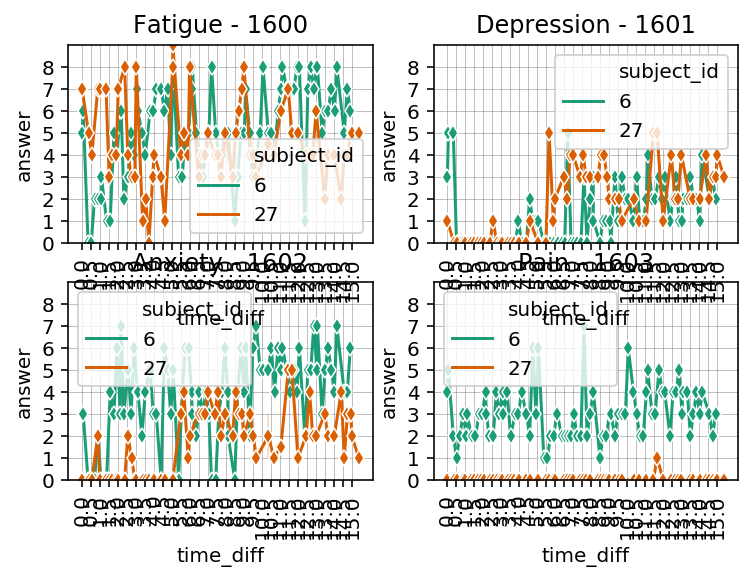

In [15]:
%matplotlib qt
#%matplotlib notebook
#%matplotlib inline
df_1600['answer']=df_1600.answer.astype('int64')
df_1601['answer']=df_1601.answer.astype('int64')
df_1602['answer']=df_1602.answer.astype('int64')
df_1603['answer']=df_1603.answer.astype('int64')

plt.subplot(2, 2, 4)
x = df_1603["time_diff"]
plt.ylim(0, 9)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Pain - 1603')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1603, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')


plt.subplot(2, 2, 3)
x = df_1602["time_diff"]
#plt.figure(figsize = (20,8))
plt.ylim(0, 9)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Anxiety - 1602')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1602, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')


plt.subplot(2, 2, 2)
x = df_1601["time_diff"]
plt.ylim(0, 9)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Depression - 1601')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1601, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')

plt.subplot(2, 2, 1)
x = df_1600["time_diff"]
plt.ylim(0, 9)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Fatigue - 1600')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1600, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')

plt.show()

In [16]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16['answer']=df_16.answer.astype('int64')
df_16.tail()

,subject_id,question_id,answer,timestamp
599,27,1603,0,2018-11-20 19:57:46
600,27,1600,5,2018-11-21 05:25:07
601,27,1601,3,2018-11-21 05:25:10
602,27,1602,1,2018-11-21 05:25:14
603,27,1603,0,2018-11-21 05:25:17


In [17]:
df_16['time_diff'] = 0
k = 0
df_16['time_diff'] = df_16['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_16)):
        if pat == df_16['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_16['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_16['time_diff'][i] = (((df_16['timestamp'][i] - df_16['timestamp'][k]).days) + ((df_16['timestamp'][i] - df_16['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_16['time_diff'] = df_16['time_diff'].round(2)
df_16.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
597,27,1601,4,2018-11-20 19:57:40,14.98
598,27,1602,2,2018-11-20 19:57:43,14.98
599,27,1603,0,2018-11-20 19:57:46,14.98
600,27,1600,5,2018-11-21 05:25:07,15.37
601,27,1601,3,2018-11-21 05:25:10,15.37
602,27,1602,1,2018-11-21 05:25:14,15.37
603,27,1603,0,2018-11-21 05:25:17,15.37


In [18]:
mask = (df_16['subject_id'] == 6)
df_16_6 = df_16.loc[mask].reset_index(drop=True)

mask = (df_16['subject_id'] == 27)
df_16_27 = df_16.loc[mask].reset_index(drop=True)

df_16_27.tail()

,subject_id,question_id,answer,timestamp,time_diff
263,27,1603,0,2018-11-20 19:57:46,14.98
264,27,1600,5,2018-11-21 05:25:07,15.37
265,27,1601,3,2018-11-21 05:25:10,15.37
266,27,1602,1,2018-11-21 05:25:14,15.37
267,27,1603,0,2018-11-21 05:25:17,15.37


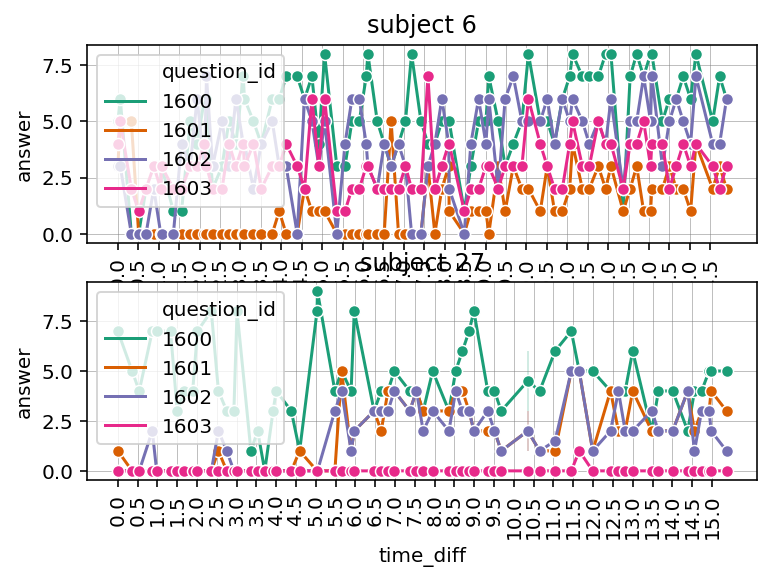

In [19]:
%matplotlib inline

plt.subplot(2, 1, 1)
x = df_16_6["time_diff"]
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('subject 6')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_6, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')

plt.subplot(2, 1, 2)
x = df_16_27["time_diff"]
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('subject 27')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "question_id", data=df_16_27, 
             palette=sns.color_palette('Dark2', n_colors=4), 
             marker = 'o')

In [20]:
mask = (df['question_id'] == 1600)
df_1600 = df.loc[mask].reset_index(drop=True)

df_1600['time_diff'] = 0
k = 0
df_1600['time_diff'] = df_1600['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1600)):
        if pat == df_1600['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1600['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1600['time_diff'][i] = (((df_1600['timestamp'][i] - df_1600['timestamp'][k]).days) + ((df_1600['timestamp'][i] - df_1600['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1600['time_diff'] = df_1600['time_diff'].round(2)
df_1600.tail(7)
#df_1600.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
144,27,1600,4,2018-11-19 20:36:13,14.01
145,27,1600,2,2018-11-20 05:56:42,14.39
146,27,1600,4,2018-11-20 09:59:13,14.56
147,27,1600,4,2018-11-20 14:10:55,14.74
148,27,1600,5,2018-11-20 18:48:51,14.93
149,27,1600,5,2018-11-20 19:57:36,14.98
150,27,1600,5,2018-11-21 05:25:07,15.37


In [21]:
df_1600[80:90]

,subject_id,question_id,answer,timestamp,time_diff
80,6,1600,8,2018-07-07 01:56:47,14.15
81,6,1600,5,2018-07-07 11:38:54,14.56
82,6,1600,7,2018-07-07 15:53:55,14.73
83,6,1600,6,2018-07-07 19:58:00,14.90
84,27,1600,7,2018-11-05 20:28:15,0.00
85,27,1600,5,2018-11-06 05:01:13,0.36
86,27,1600,4,2018-11-06 09:23:17,0.54
87,27,1600,7,2018-11-06 17:25:52,0.87
88,27,1600,7,2018-11-06 19:55:47,0.98
89,27,1600,7,2018-11-07 04:20:52,1.33


In [22]:
mask = (df_1600['question_id'] == 1600) & (df_1600['time_diff'] <= 1)
df_1600_day = df_1600.loc[mask].reset_index(drop=True)
df_1600_day["time_diff"] = df_1600_day["time_diff"]*24
df_1600_day.tail()

,subject_id,question_id,answer,timestamp,time_diff
6,27,1600,7,2018-11-05 20:28:15,0.00
7,27,1600,5,2018-11-06 05:01:13,8.64
8,27,1600,4,2018-11-06 09:23:17,12.96
9,27,1600,7,2018-11-06 17:25:52,20.88
10,27,1600,7,2018-11-06 19:55:47,23.52


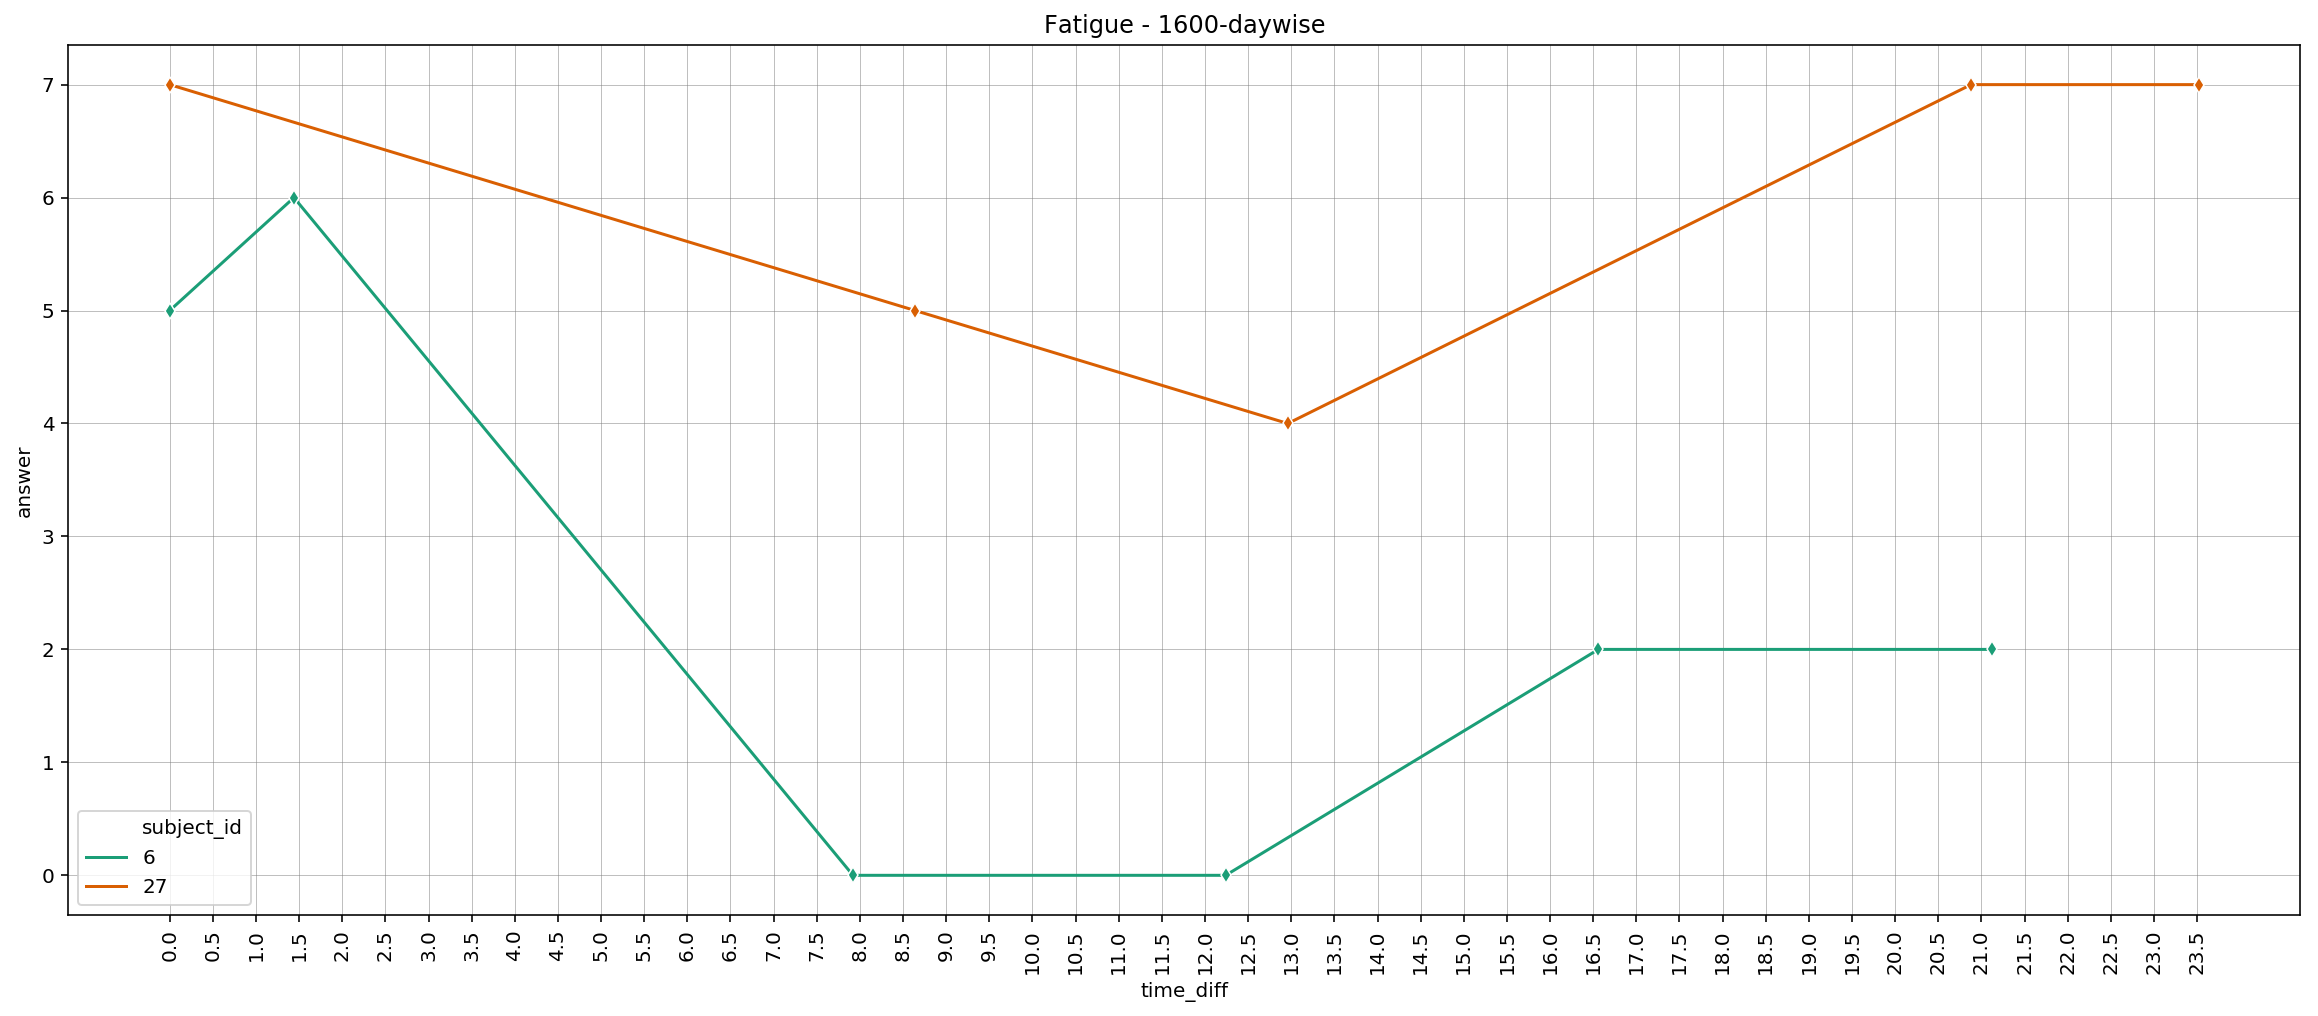

In [23]:
%matplotlib qt
df_1600_day['answer']=df_1600_day.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1600_day["time_diff"]
plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Fatigue - 1600-daywise')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data=df_1600_day, 
             palette=sns.color_palette('Dark2', n_colors=2), 
             marker = 'd')
plt.show()

In [24]:
mask = (df['question_id'] == 1601)
df_1601 = df.loc[mask].reset_index(drop=True)

df_1601['time_diff'] = 0
k = 0
df_1601['time_diff'] = df_1601['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1601)):
        if pat == df_1601['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1601['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1601['time_diff'][i] = (((df_1601['timestamp'][i] - df_1601['timestamp'][k]).days) + ((df_1601['timestamp'][i] - df_1601['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1601['time_diff'] = df_1601['time_diff'].round(2)
df_1601.tail(7)
#df_1600.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
144,27,1601,2,2018-11-19 20:36:16,14.01
145,27,1601,4,2018-11-20 05:56:44,14.39
146,27,1601,2,2018-11-20 09:59:16,14.56
147,27,1601,3,2018-11-20 14:10:58,14.74
148,27,1601,3,2018-11-20 18:48:55,14.93
149,27,1601,4,2018-11-20 19:57:40,14.98
150,27,1601,3,2018-11-21 05:25:10,15.37


In [25]:
mask = (df_1601['question_id'] == 1601) & (df_1601['time_diff'] <= 2)
df_1601_day = df_1601.loc[mask].reset_index(drop=True)
df_1601_day["time_diff"] = df_1601_day["time_diff"]*24
df_1601_day.tail()

,subject_id,question_id,answer,timestamp,time_diff
16,27,1601,0,2018-11-06 19:55:54,23.52
17,27,1601,0,2018-11-07 04:20:56,31.92
18,27,1601,0,2018-11-07 08:26:45,36.00
19,27,1601,0,2018-11-07 12:41:20,40.32
20,27,1601,0,2018-11-07 17:54:02,45.36


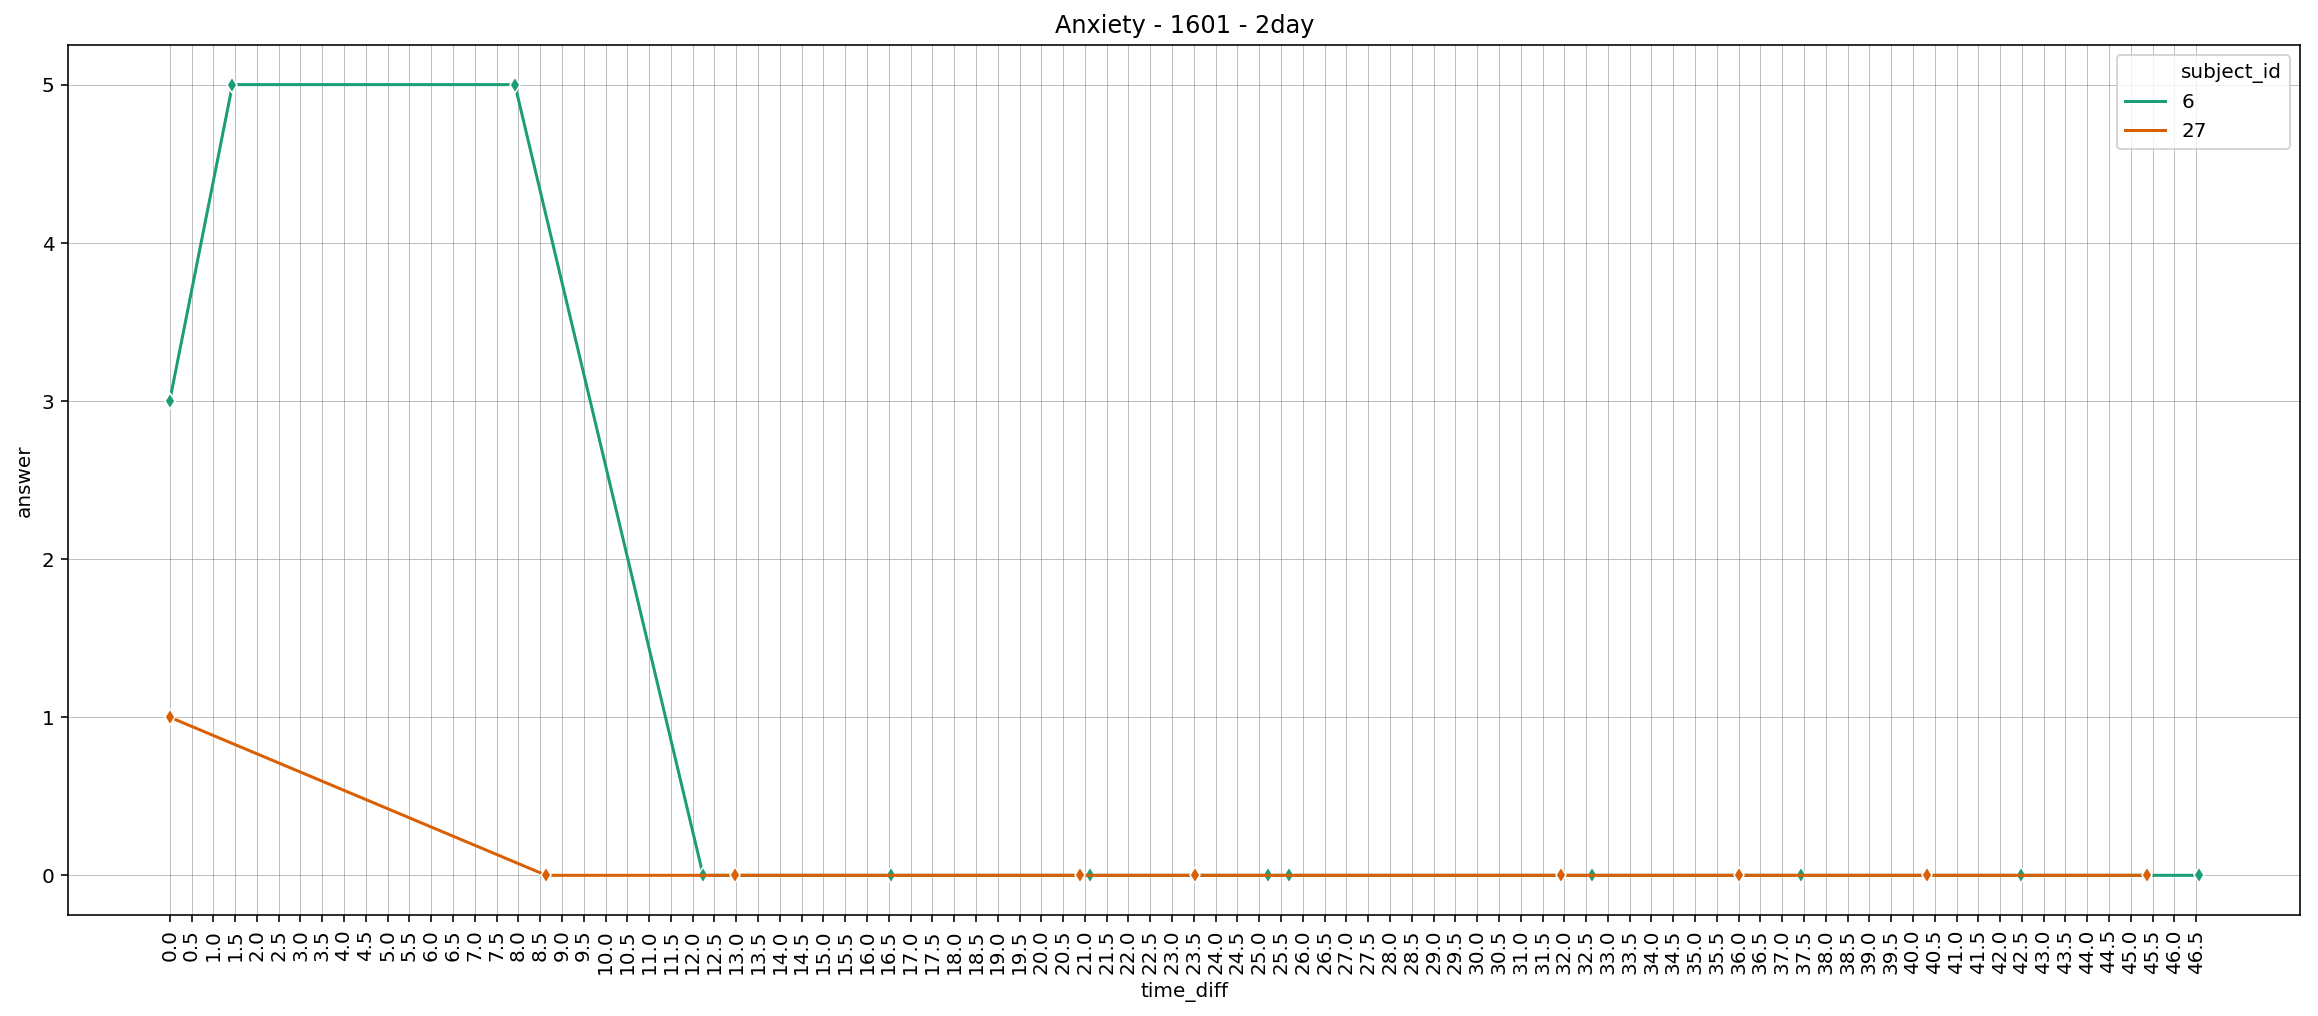

In [26]:
%matplotlib qt
df_1601_day['answer'] = df_1601_day.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1601_day["time_diff"]
plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Anxiety - 1601 - 2day')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data = df_1601_day, 
             palette=sns.color_palette('Dark2', n_colors = 2), 
             marker = 'd')
plt.show()

In [27]:
mask = (df['question_id'] == 1602)
df_1602 = df.loc[mask].reset_index(drop=True)

df_1602['time_diff'] = 0
k = 0
df_1602['time_diff'] = df_1602['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1602)):
        if pat == df_1602['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1602['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1602['time_diff'][i] = (((df_1602['timestamp'][i] - df_1602['timestamp'][k]).days) + ((df_1602['timestamp'][i] - df_1602['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1602['time_diff'] = df_1602['time_diff'].round(2)
#df_1602.tail(7)
#df_1600.tail()

mask = (df_1602['question_id'] == 1602) & (df_1602['time_diff'] <= 1)
df_1602_day = df_1602.loc[mask].reset_index(drop=True)
df_1602_day["time_diff"] = df_1602_day["time_diff"]*24
#df_1602_day.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


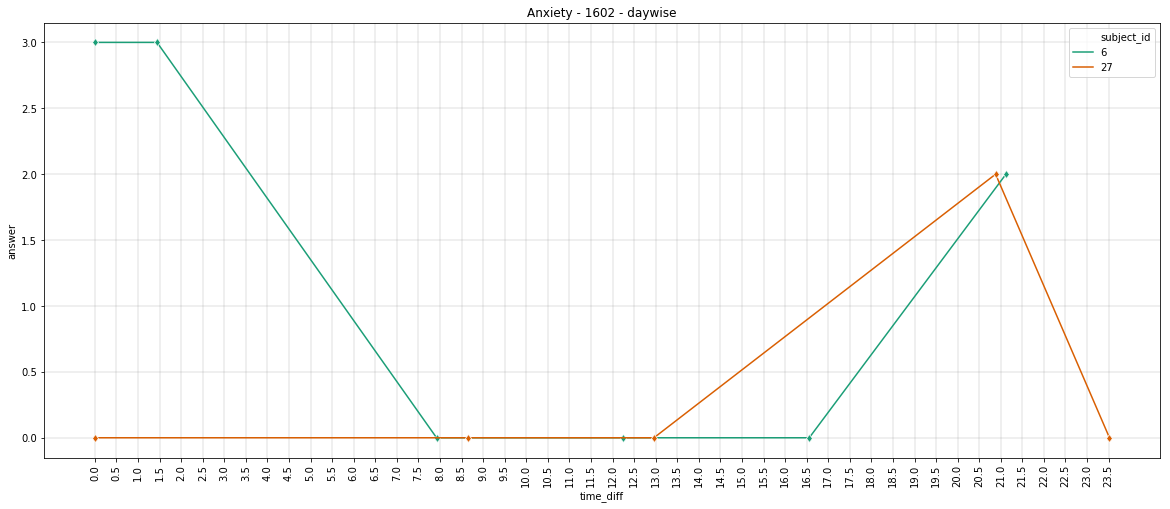

In [28]:
%matplotlib inline
df_1602_day['answer'] = df_1602_day.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1602_day["time_diff"]
plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Anxiety - 1602 - daywise')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data = df_1602_day, 
             palette=sns.color_palette('Dark2', n_colors = 2), 
             marker = 'd')
plt.show()

In [29]:
mask = (df['question_id'] == 1603)
df_1603 = df.loc[mask].reset_index(drop=True)

df_1603['time_diff'] = 0
k = 0
df_1603['time_diff'] = df_1603['time_diff'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1603)):
        if pat == df_1603['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1603['time_diff'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1603['time_diff'][i] = (((df_1603['timestamp'][i] - df_1603['timestamp'][k]).days) + ((df_1603['timestamp'][i] - df_1603['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1603['time_diff'] = df_1603['time_diff'].round(2)
#df_1602.tail(7)
#df_1600.tail()

mask = (df_1603['question_id'] == 1603) & (df_1603['time_diff'] <= 2)
df_1603_day = df_1603.loc[mask].reset_index(drop=True)
df_1603_day["time_diff"] = df_1603_day["time_diff"]*24
df_1603_day.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time_diff
16,27,1603,0,2018-11-06 19:56:02,23.52
17,27,1603,0,2018-11-07 04:21:04,31.92
18,27,1603,0,2018-11-07 08:26:53,36.00
19,27,1603,0,2018-11-07 12:41:27,40.32
20,27,1603,0,2018-11-07 17:54:10,45.36


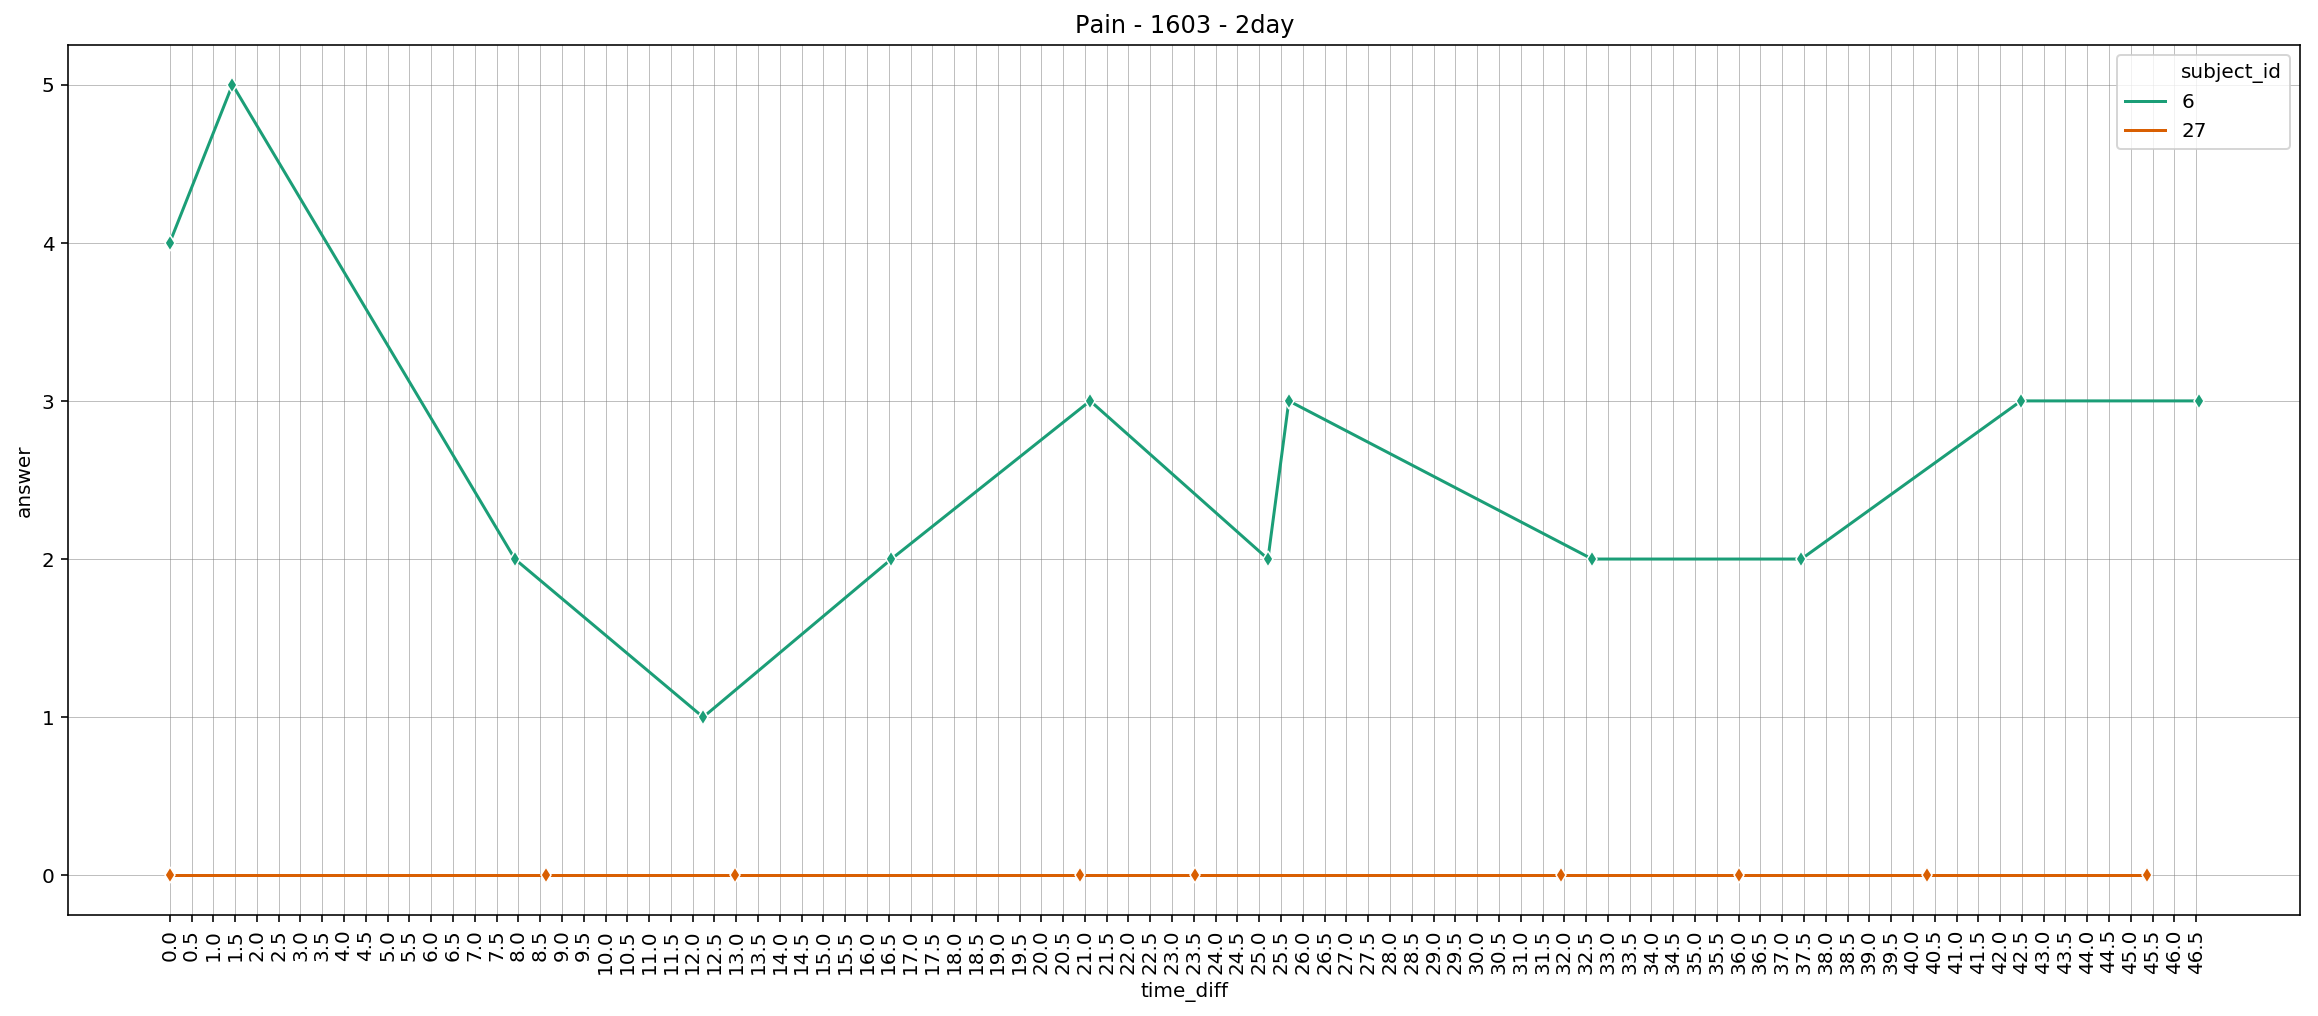

In [30]:
%matplotlib qt
df_1603_day['answer'] = df_1603_day.answer.astype('int64')

#plt.xlim(0, 16, 0.25)
x = df_1603_day["time_diff"]
plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, max(x), 0.5),rotation='vertical')
plt.title('Pain - 1603 - 2day')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", hue = "subject_id", data = df_1603_day, 
             palette=sns.color_palette('Dark2', n_colors = 2), 
             marker = 'd')
plt.show()